## This will be the Main File for our testing adn things. We can read/write etc in this file

## Step 1: Import the Appropriate Libaries and read in the data file



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.options.display.max_columns = None
import backend as bk

In [2]:
df = pd.read_excel('Competition1_raw_data.xlsx', na_values='-')
df.set_index('I1', inplace=True)
df.head(15)

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
I1,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,-0.057556,42402916.0,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,0.004106,19047022.0,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,0.040620,19371750.0,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,-0.029316,52982501.0,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0


## Step 2: Now Lets analyze the data that we have to work with

In [3]:
print('Checking the shape of our data \n')
print(df.shape)

print('Checking the data types we have \n')
print(df.dtypes)

print('Checking for missing values \n')
print(df.isna().sum())

Checking the shape of our data 

(682, 21)
Checking the data types we have 

I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object
Checking for missing values 

I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64


## Step 3: Formatting our data 

In order to make sure our data matches with our data dictionary, we need to convert certain columns to certain values. 

In [4]:
#need to convert these rows to the values as indicated by the Data Dictionary 

to_float = ['I3','P(IPO)','P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

for col in to_float:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df['C2'] = df['C2'].astype('bool') 
print(df.dtypes)

I2          object
I3         float64
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2            bool
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object


In [5]:
df = df.dropna(subset=['P(1Day)'])
print(df.isna().sum())

I2          0
I3          4
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
dtype: int64


/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of EPS ')

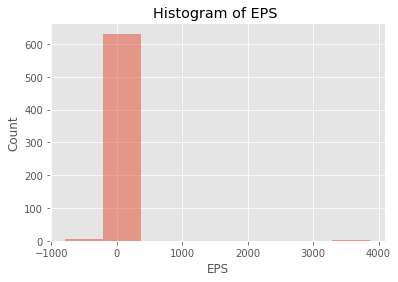

In [6]:
plt.hist(df["C3"], bins=8, alpha=0.5)
plt.xlabel('EPS')
plt.ylabel('Count')
plt.title('Histogram of EPS ')

We have massive outliers so we can't use the mean for our imputation so we went with median instead. 

/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of Sales ')

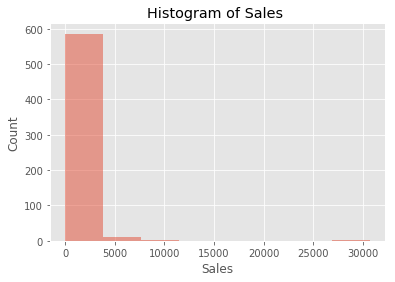

In [7]:
plt.hist(df["C7"], bins=8, alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales ')

In [8]:
df['C7_Impute'] = np.where(df['C7'].isna(),1,0)
df['C3_Impute'] = np.where(df['C3'].isna(),1,0)

In [9]:
c7_median = df['C7'].median()
print(c7_median)
df['C7'] = df['C7'].fillna(c7_median)

c3_median = df['C3'].median()
print(c3_median)
df['C3'] = df['C3'].fillna(c3_median)

107.462
0.0


In [10]:
df.describe()

,I3,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C7_Impute,C3_Impute
count,656.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,6503.027439,14.034621,15.610394,13.635394,25.934766,149.728788,0.066724,0.007282,4.996285e+07,1.258248e+07,470.631368,468.701515,12849.703030,11463.393939,295.957576,669.890909,68.675758,120.896970,145.516667,0.090909,0.036364
std,29707.190442,5.954214,6.613816,5.790112,73.234948,152.817467,158.390378,0.033318,1.055377e+08,2.539940e+07,1587.801852,176.374430,5461.888999,4867.297323,122.172959,298.268982,39.410385,85.542267,69.824545,0.287698,0.187335
min,100.000000,5.000000,0.000000,5.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,8.000000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,40.000000,0.000000,0.000000
25%,3304.250000,10.000000,13.000000,11.000000,11.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,356.000000,9213.750000,8200.250000,214.000000,463.750000,45.000000,74.000000,100.000000,0.000000,0.000000
50%,3990.000000,13.750000,15.500000,13.000000,14.845000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,446.000000,12112.500000,10829.500000,280.000000,627.000000,60.000000,101.500000,135.000000,0.000000,0.000000
75%,7372.000000,17.000000,17.000000,15.000000,20.485000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,553.250000,15275.000000,13793.500000,355.250000,801.250000,85.000000,144.000000,174.000000,0.000000,0.000000
max,541990.000000,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,2729.000000,309.000000,944.000000,883.000000,1.000000,1.000000


In [11]:
## Creating Necessary Variables Y1, Y2, C3', C5', and C6'
## Code found on https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
df['P(Mid)'] = (df['P(H)'] + df['P(L)']) / 2
df['Y1'] = np.where(df['P(IPO)'] < df['P(Mid)'], 1,0)
df['Y2'] = np.where(df['P(IPO)'] < df['P(1Day)'], 1,0)
df["C3'"] = np.where(df['C3'] > 0, 1, 0)
df["C5'"] = df['C5'] / df['C6']
df["C6'"] = np.where(df['P(IPO)'] > df['P(Mid)'], ((df['P(IPO)'] - df['P(Mid)']) / df['P(Mid)']) * 100,0)

In [12]:
df['industry'] = df['I3'].apply(bk.assign_sector)
df['industry'].value_counts()

Manufacturing                              296
Services                                   200
Transportation/Communications/Utulities     58
Retail Trade                                48
Mining                                      31
Wholesale Trade                             13
Finance/Insurance/Realestate                 5
Agriculture/Forestry/Fishing                 2
Non Classafiable Establishments              2
Construction                                 1
Name: industry, dtype: int64

In [13]:
df['industry'] = df['industry'].replace(['Mining', 'Wholesale Trade', 'Finance/Insurance/Realestate', 'Non Classafiable Establishments',
                                            'Agriculture/Forestry/Fishing', 'Construction', 'NaN'],'Other')
df['industry'].value_counts()

df['industry'] = df['industry'].replace({'Manufacturing': 1, 'Services': 2, 'Transportation/Communications/Utulities': 3, 'Retail Trade': 4,'Other': 5})


df.head()

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C7_Impute,C3_Impute,P(Mid),Y1,Y2,C3',C5',C6',industry
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,0,9.0,0,1,1,3.864345,11.111111,1.0
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,False,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,0,0,9.0,1,0,0,12.028832,0.000000,1.0
ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,True,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,0,0,13.0,1,0,0,3.369134,0.000000,1.0
ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,True,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,0,0,15.0,1,1,0,3.299697,0.000000,1.0
ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,True,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,0,20.0,0,1,1,3.726269,5.000000,3.0


In [14]:
t5_mean = df['T5'].mean()
s1_mean =df['S1'].mean()

df.at['ACRX', 'T5'] = t5_mean
df.at['COGT', 'S1'] = s1_mean
df[df.index.str.startswith('ACRX')]
df[df.index.str.startswith('COGT')]

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C7_Impute,C3_Impute,P(Mid),Y1,Y2,C3',C5',C6',industry
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
COGT,"Cogent, inc.",7373.0,12.0,12.0,10.0,17.98,133.0,True,0.14,0.008014,78000000.0,18000000.0,32.179,419.0,10764.0,9856.0,259.0,643.0,68.675758,97.0,134.0,0,0,11.0,0,1,1,4.333333,9.090909,2.0


In [15]:
df["S1'"]= df['S1']/df['T2']
df["S2'"]= df['S2']/df['T2']
df["S3'"]= df['S3']/df['T2']

df["T3'"]= df['T3']/df['T2']
df["T4'"]= df['T4']/df['T1']
df["T5'"]= df['T5']/df['T2']

df.head()

,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C7_Impute,C3_Impute,P(Mid),Y1,Y2,C3',C5',C6',industry,S1',S2',S3',T3',T4',T5'
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,0,0,9.0,0,1,1,3.864345,11.111111,1.0,0.004875,0.009199,0.010929,0.908876,0.640426,0.054250
ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,259.0,False,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,0,0,9.0,1,0,0,12.028832,0.000000,1.0,0.003258,0.011105,0.010876,0.898724,0.644753,0.051395
ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,90.0,True,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,0,0,13.0,1,0,0,3.369134,0.000000,1.0,0.011593,0.006271,0.011403,0.909350,0.636816,0.061764
ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,209.0,True,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,0,0,15.0,1,1,0,3.299697,0.000000,1.0,0.009686,0.007144,0.013319,0.917060,0.539634,0.061630
ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,80.0,True,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,0,0,20.0,0,1,1,3.726269,5.000000,3.0,0.004518,0.010047,0.011261,0.888469,0.587413,0.048550


In [16]:
df = df.drop(columns = ['I2', 'I3', 'C7_Impute', 'C3_Impute'])
df.head()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,P(Mid),Y1,Y2,C3',C5',C6',industry,S1',S2',S3',T3',T4',T5'
I1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AATI,10.0,9.5,8.5,11.870000,122.0,True,3.43,0.029074,40962052.0,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0,9.0,0,1,1,3.864345,11.111111,1.0,0.004875,0.009199,0.010929,0.908876,0.640426,0.054250
ABPI,8.0,10.0,8.0,7.250000,259.0,False,-1.62,-0.013352,28869196.0,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0,9.0,1,0,0,12.028832,0.000000,1.0,0.003258,0.011105,0.010876,0.898724,0.644753,0.051395
ACAD,7.0,14.0,12.0,6.700000,90.0,True,-1.24,0.020715,16845668.0,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0,13.0,1,0,0,3.369134,0.000000,1.0,0.011593,0.006271,0.011403,0.909350,0.636816,0.061764
ACHN,11.5,16.0,14.0,12.390000,209.0,True,-0.91,0.020023,14848637.0,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0,15.0,1,1,0,3.299697,0.000000,1.0,0.009686,0.007144,0.013319,0.917060,0.539634,0.061630
ACLI,21.0,21.0,19.0,56.599998,80.0,True,0.07,-0.034895,30741716.0,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0,20.0,0,1,1,3.726269,5.000000,3.0,0.004518,0.010047,0.011261,0.888469,0.587413,0.048550


## For pos skewed
 - Square root, cube root, log (strong and popular), 1/x
 - Can combine them
 - Ex: SQRT(x)/LOG(x) or 1/LOG(x)
***always start with log***
 - Ex: original skew is -2 
 - Using log, skew is now 1
        - We overshot it… try something weaker
        - Try using SQRT(x) or 1/x 
        - Or we can do log(x^2) would overshoot, then bring it back 
## Negatively skewed
 - Square, cubic, e^x
 - Converting into a ratio value is also an option, 


In [17]:
pos_skew= ['ALL OTHER COLUMNS']
neg_skew = ['C2', 'Y2', "T4'"]
ok_skew = ['Y1', 'C4', "C3'"]
error_skew= ["S1'", "S2'", "S3'", "T3'", "T5'"]


print(df.skew())
s1 = df.skew() < 0.5 
s2 = df.skew() > -0.5
s1 & s2 # logical OR

P(IPO)       3.652781
P(H)         9.539859
P(L)         7.399880
P(1Day)     12.318970
C1           5.649485
C2          -2.068874
C3          21.727253
C4          -0.477892
C5          13.461312
C6          12.439171
C7          12.163784
T1           1.749729
T2           1.662345
T3           1.613799
T4           1.420226
T5           1.930485
S1           2.329712
S2           3.731903
S3           3.448485
P(Mid)       8.543764
Y1           0.000000
Y2          -0.866988
C3'          0.091211
C5'         13.405536
C6'          4.372685
industry     1.170005
S1'               NaN
S2'               NaN
S3'               NaN
T3'               NaN
T4'         -1.595377
T5'               NaN
dtype: float64


P(IPO)      False
P(H)        False
P(L)        False
P(1Day)     False
C1          False
C2          False
C3          False
C4           True
C5          False
C6          False
C7          False
T1          False
T2          False
T3          False
T4          False
T5          False
S1          False
S2          False
S3          False
P(Mid)      False
Y1           True
Y2          False
C3'          True
C5'         False
C6'         False
industry    False
S1'         False
S2'         False
S3'         False
T3'         False
T4'         False
T5'         False
dtype: bool

In [18]:
df_normalize_list = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2',
                     'S3', 'P(Mid)', "C3'", "C5'", "C6'", 'industry', "S1'", "S2'", "S3'", "T3'", "T4'", "T5'"]

for col in df_normalize_list:
    df[col] = np.log(df[col])


    
print(df.skew())
s1 = df.skew() < 0.5 
s2 = df.skew() > -0.5
s1 & s2 # logical OR

P(IPO)      0.003669
P(H)             NaN
P(L)        0.333878
P(1Day)          NaN
C1          0.132069
C2         -2.068874
C3               NaN
C4         -1.599844
C5          0.804566
C6          0.889634
C7         -0.652849
T1         -0.108778
T2               NaN
T3               NaN
T4               NaN
T5          0.047849
S1         -0.143917
S2          0.260932
S3          0.200103
P(Mid)      0.351520
Y1          0.000000
Y2         -0.866988
C3'              NaN
C5'         0.427372
C6'              NaN
industry    0.505493
S1'              NaN
S2'              NaN
S3'              NaN
T3'              NaN
T4'              NaN
T5'              NaN
dtype: float64


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


P(IPO)       True
P(H)        False
P(L)         True
P(1Day)     False
C1           True
C2          False
C3          False
C4          False
C5          False
C6          False
C7          False
T1           True
T2          False
T3          False
T4          False
T5           True
S1           True
S2           True
S3           True
P(Mid)       True
Y1           True
Y2          False
C3'         False
C5'          True
C6'         False
industry    False
S1'         False
S2'         False
S3'         False
T3'         False
T4'         False
T5'         False
dtype: bool